In [1]:
import os, sys, json, string
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [48]:
path_prefix = '../res_param_search/'
lsign, ltt, lval, ltimes = [], [], [], []
loa, laa, lkappa = [], [], []
for path in os.listdir(path_prefix):
# path = '../res_param_search/WH_cross_param_use.json_layer_1_0_1703184182.json'
    if 'best' in path:
        items = path.split('_')
        print(items)
        sign, tt, val, times = items[0], items[4], -1, int(items[5].split('.')[0])
    else:
        items = path.split('_')
        sign, tt, val, times = items[0], items[4], int(items[5]), int(items[6])
    abs_path = '%s/%s' % (path_prefix, path)
    ss = json.loads(open(abs_path, 'r').read())
    oa, aa, kappa = ss['eval']['oa'], ss['eval']['aa'], ss['eval']['kappa']
    for k in ['sign', 'tt', 'val', 'times', 'oa', 'aa', 'kappa']:
        eval('l%s.append(%s)' % (k, k))
dd = {
    'sign': lsign,
    'tt': ltt,
    'val': lval,
    'times': ltimes,
    'oa': loa,
    'aa': laa,
    'kappa': lkappa
}
df = pd.DataFrame(dd)

['pavia', 'cross', 'param', 'use.json', 'best', '0.json']
['WH', 'cross', 'param', 'use.json', 'best', '0.json']
['pavia', 'cross', 'param', 'use.json', 'best', '4.json']
['pavia', 'cross', 'param', 'use.json', 'best', '2.json']
['indian', 'cross', 'param', 'use.json', 'best', '1.json']
['pavia', 'cross', 'param', 'use.json', 'best', '1.json']
['indian', 'cross', 'param', 'use.json', 'best', '4.json']
['WH', 'cross', 'param', 'use.json', 'best', '4.json']
['WH', 'cross', 'param', 'use.json', 'best', '1.json']
['WH', 'cross', 'param', 'use.json', 'best', '2.json']
['WH', 'cross', 'param', 'use.json', 'best', '3.json']
['pavia', 'cross', 'param', 'use.json', 'best', '3.json']
['indian', 'cross', 'param', 'use.json', 'best', '3.json']
['indian', 'cross', 'param', 'use.json', 'best', '0.json']
['indian', 'cross', 'param', 'use.json', 'best', '2.json']


In [49]:
temp_df = df.groupby(['sign', 'tt', 'val']).mean().reset_index()

In [50]:
# temp_df.to_csv('./analysis_new.csv')

In [8]:
temp_df = pd.read_csv('./analysis.csv')

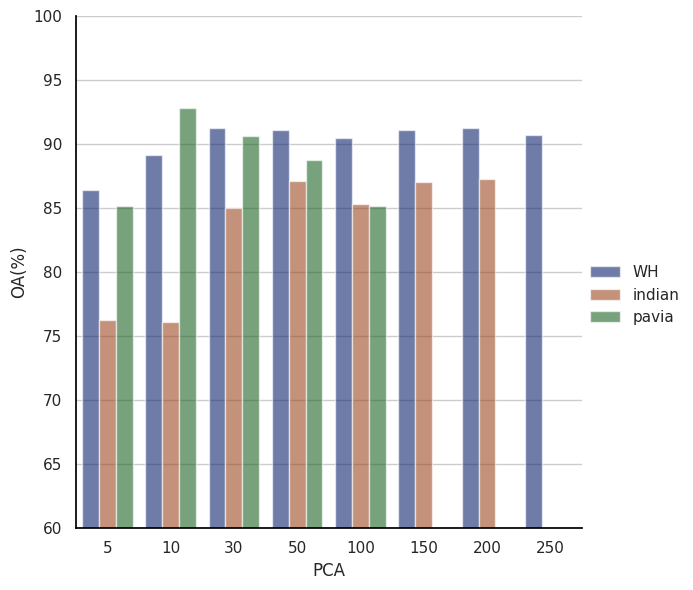

In [32]:
use_df = temp_df
import seaborn as sns
sns.set_theme(style="whitegrid")
df_temp = use_df[use_df['tt']=='pca']
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_temp, kind="bar",
    x="val", y="oa", hue="sign",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

ax = plt.gca()
plt.ylim(60, 100)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
# g.despine(left=True)
g.set_axis_labels("", "OA(%)")
g.set(xlabel='PCA')
g.legend.set_title("")

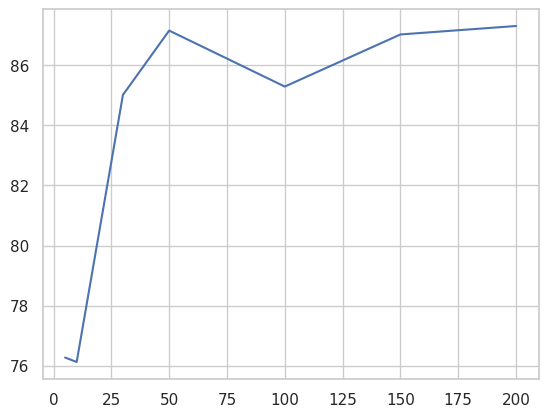

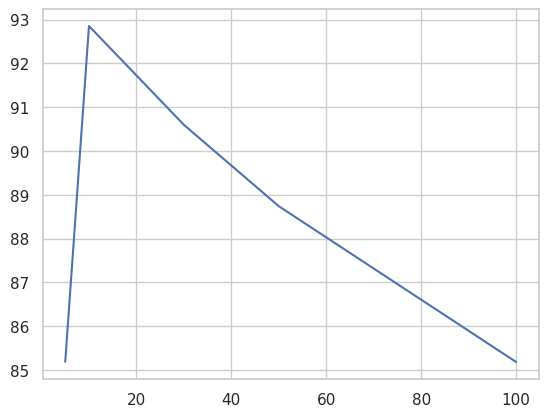

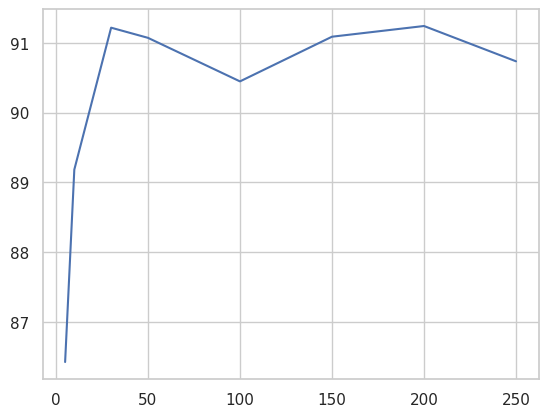

(84.0, 95.0)

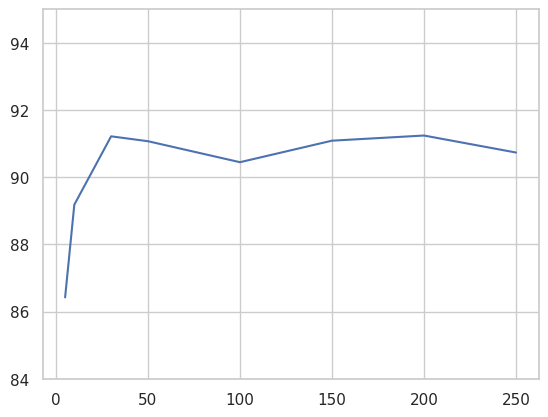

In [10]:
use_df[use_df['tt']=='pca']

,Unnamed: 0,sign,tt,val,times,oa,aa,kappa
12,12,WH,pca,5,0.0,86.423890,83.836302,83.021796
13,13,WH,pca,10,0.0,89.182168,88.143904,86.438846
14,14,WH,pca,30,0.0,91.216463,90.197841,88.949686
15,15,WH,pca,50,0.0,91.071101,90.918453,89.770858
16,16,WH,pca,100,0.0,90.446681,90.157492,87.982975
17,17,WH,pca,150,0.0,91.087088,90.782201,88.807819
18,18,WH,pca,200,0.0,91.240568,90.879267,89.724200
19,19,WH,pca,250,0.0,90.734411,90.031929,88.347813
32,32,indian,pca,5,0.0,76.271186,86.198266,73.373951
33,33,indian,pca,10,0.0,76.122510,86.181490,73.215530
